In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('./dataset/train.csv')

### Explore

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#most commmon values of each feature
for col in df.columns:
    print(df[col].value_counts().sort_values(ascending=False))

1       1
22      1
4       1
5       1
6       1
       ..
1458    1
1459    1
1440    1
1372    1
1460    1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
150.0      1
46.0       1
106.0      1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
12150     1
14200     1
7599      1
3982      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311


In [5]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

Dataset does not have werid Nan values, the attributes with high nan values are all intentional (eg. does not have pool so PoolQC is Nan)

#### Useful
Logically what might correlate lot with SalePrice: 

Category Type: MSSubClass, Neighborhood, OverallCond, 

Number: GrLivArea, YrSold, LotArea, YearBuilt, YearRemodAdd, PoolArea

In [6]:
df.loc[:,["GrLivArea","SalePrice"]].sort_values('GrLivArea', ascending=False).head(30)

,GrLivArea,SalePrice
1298,5642,160000
523,4676,184750
1182,4476,745000
691,4316,755000
1169,3627,625000
185,3608,475000
304,3493,295000
1268,3447,381000
635,3395,200000
769,3279,538000


In [7]:
df.loc[:,["GrLivArea","SalePrice"]].sort_values('GrLivArea', ascending=False).tail(30)

,GrLivArea,SalePrice
952,768,133900
543,767,133000
264,764,73000
125,754,84500
372,752,125000
935,747,79900
68,747,80000
710,729,52000
495,720,34900
353,720,105900


In [8]:
df.groupby('Neighborhood')['SalePrice'].median()

Neighborhood
Blmngtn    191000
Blueste    137500
BrDale     106000
BrkSide    124300
ClearCr    200250
CollgCr    197200
Crawfor    200624
Edwards    121750
Gilbert    181000
IDOTRR     103000
MeadowV     88000
Mitchel    153500
NAmes      140000
NPkVill    146000
NWAmes     182900
NoRidge    301500
NridgHt    315000
OldTown    119000
SWISU      139500
Sawyer     135000
SawyerW    179900
Somerst    225500
StoneBr    278000
Timber     228475
Veenker    218000
Name: SalePrice, dtype: int64

In [9]:
df.groupby('Neighborhood')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,17.0,194870.882353,30393.229219,159895.0,174000.00,191000.0,213490.00,264561.0
Blueste,2.0,137500.000000,19091.883092,124000.0,130750.00,137500.0,144250.00,151000.0
BrDale,16.0,104493.750000,14330.176493,83000.0,91000.00,106000.0,118000.00,125000.0
BrkSide,58.0,124834.051724,40348.689270,39300.0,100500.00,124300.0,141175.00,223500.0
ClearCr,28.0,212565.428571,50231.538993,130000.0,183750.00,200250.0,242225.00,328000.0
CollgCr,150.0,197965.773333,51403.666438,110000.0,152958.75,197200.0,225725.00,424870.0
Crawfor,51.0,210624.725490,68866.395472,90350.0,159250.00,200624.0,239000.00,392500.0
Edwards,100.0,128219.700000,43208.616459,58500.0,101500.00,121750.0,145225.00,320000.0
Gilbert,79.0,192854.506329,35986.779085,141000.0,174000.00,181000.0,197200.00,377500.0


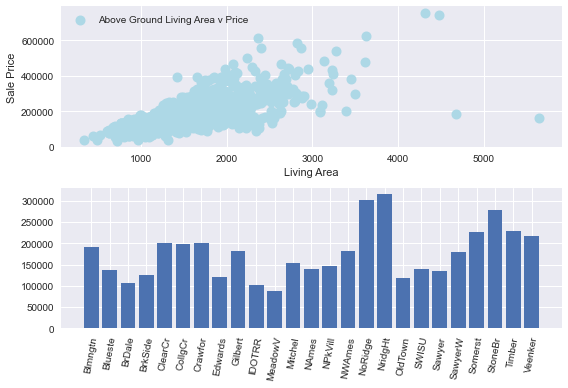

In [10]:
fig1 = plt.figure()

ax1_x = df.loc[:,'GrLivArea']
ax1_y = df.loc[:,'SalePrice']

ax1 = fig1.add_subplot(211)
ax1.scatter(ax1_x, ax1_y , color='lightblue', linewidth=3, label="Above Ground Living Area v Price")
ax1.set( xlabel="Living Area", ylabel="Sale Price")
ax1.legend()

ax2 = fig1.add_subplot(212)
ax2_y = df.groupby('Neighborhood')['SalePrice'].median().values
ax2_x = df.groupby('Neighborhood')['SalePrice'].median().index
ax2.bar(ax2_x, ax2_y)
ax2.tick_params(axis='x', rotation=80)

plt.tight_layout()



#### Observation from graphs

Neighborhood is not a great predictor but there is a trend with above ground living area

In [11]:
df.sort_index()
dfT = df[['GrLivArea', 'SalePrice']]
dfT

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


In [12]:
X_all = dfT.loc[:,'GrLivArea'].values.reshape(-1,1)
y_all = dfT.loc[:,'SalePrice'].values.reshape(-1,1)


### Regression Fitting

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)
# #for locally testing accuracy


regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


regressor.intercept_

array([11073.98204162])

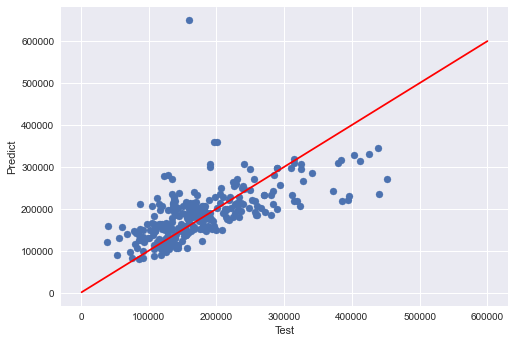

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test')
plt.ylabel('Predict')

x_ref = np.linspace(1000,600000,2) 
y_ref = x_ref
plt.plot(x_ref, y_ref, color="red")
plt.show()


The red line help show how far off each prediction is from the true value

In [15]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

61727.09316078772

To Use Model for the assigned test data

In [16]:
testing_df = pd.read_csv('./dataset/test.csv')
testing_df = testing_df[['Id','GrLivArea']]
testing_df


,Id,GrLivArea
0,1461,896
1,1462,1329
2,1463,1629
3,1464,1604
4,1465,1280
...,...,...
1454,2915,1092
1455,2916,1092
1456,2917,1224
1457,2918,970


In [17]:
X_test = testing_df.loc[:,'GrLivArea'].values.reshape(-1,1)
y_pred = regressor.predict(X_test)
y_pred

array([[112442.51526671],
       [161429.76402392],
       [195370.12113054],
       ...,
       [149550.63903661],
       [120814.47001967],
       [237343.02941905]])

In [18]:
# fit needs and returns a 2D array [[1,2,3]] so need to convert in and out

y_pred_flat = y_pred.ravel()
my_ans = pd.DataFrame({'Id': testing_df['Id'].values, 'SalePrice': y_pred_flat})
my_ans

,Id,SalePrice
0,1461,112442.515267
1,1462,161429.764024
2,1463,195370.121131
3,1464,192541.758038
4,1465,155886.172363
...,...,...
1454,2915,134616.881910
1455,2916,134616.881910
1456,2917,149550.639037
1457,2918,120814.470020


In [19]:
# my_ans.to_csv('my_pred.csv',index=False)